In [27]:
from sympy import solve
from sympy import Symbol
from math import cos, sin, pi, sqrt, tan
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x1, y1, x2, y2, x3, y3 = (0,0, 0, 2, 3, 1.5)

In [42]:
def majoraxis(A, B, C, D, E):
    return ((2*(A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C - sqrt((A-C)**2 + B**2)))
def minoraxis(A, B, C, D, E):
    return ((2*(A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C + sqrt((A-C)**2 + B**2)))

def printeq(A, B, C, D, E):
    #print(majoraxis(A,B,C,D,E))
    #print(minoraxis(A,B,C,D,E))

    print(f"{A}x^2+{B}xy+{C}y^2+{D}x+{E}y=0")

Newton solution 5.077399390857533e+19: 0.03332924238029755 a^2:9
1.3x^2+-1xy+1.3y^2+-0.3427056666666667x+-0.0026000000000000003y=0


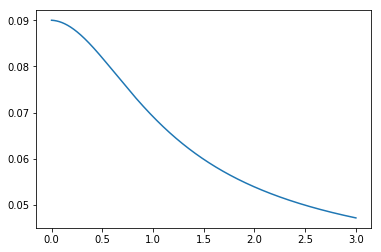

Newton solution 1.9441553253293677: 9.000000020889908 a^2:9
1.2047083341059293x^2+-1xy+1.719070528819248y^2+-4.1983130791691154x+-3.438141057638496y=0


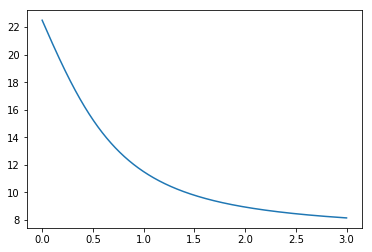

Newton solution 5.13814109444487: 24.999999989224126 a^2:25
0.6061201473425637x^2+-1xy+0.8007430628325949y^2+-1.1821876799191129x+-1.6014861256651898y=0


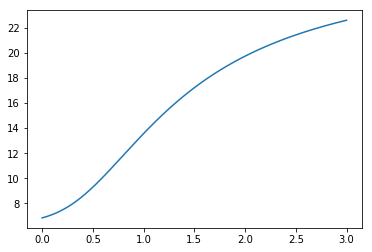

Newton solution 3.0587179126369636e+30: 4.292602539062501 a^2:9
1.2999999999999998x^2+-1xy+1.2999999999999998y^2+-2.0749999999999997x+-2.5999999999999996y=0


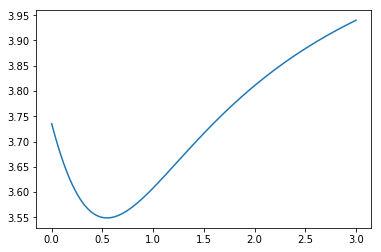

Newton solution 0.2480859479579142: 100.00000195434703 a^2:100
0.10304548812526892x^2+-1xy+4.1339065998946545y^2+1.1019968200997006x+-8.267813199789309y=0


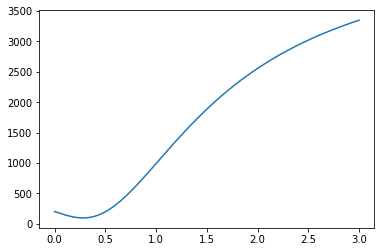

Newton solution 4.079643403300767: 400.0000030544641 a^2:400
0.4026420994390172x^2+-1xy+0.6477615623780862y^2+2.323716133466407x+-2.591046249512345y=0


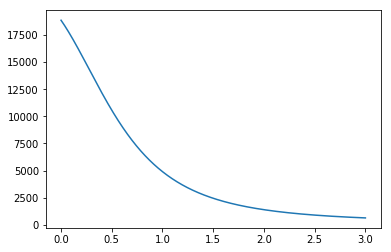

In [48]:
# second approach setting B to be 1.

def g2(a, b, y2, x3, y3):
    q = a**2 / b**2
    w = (a**2-b**2)/(a**2+b**2)
    def eq(tx):
        t = tan(2*tx)
        t = tx


        B = -1
        C = (w + sqrt(t**2+1))/(2*t*w)
        #A = (-C*w**2 - C + sqrt(4*C**2*w**2 + w**2-1))/(w**2-1)
        A = C - 1/t
        
        if 4*C**2*w**2 + w**2-1 < 0:
            return 0
        
        if (A-C)**2 + B**2 < 0:
            return 0
        
        if 4*A*C - B**2 < 0:
            return 0
        
        

        E = -C*y2
        D = -(A*x3**2 + B*x3*y3 + C*(y3**2-y2*y3))/x3
        
        return (A, B, C, D, E)
    
    def f2(tx):
        if (eq(tx) == 0):
            return 0
        return majoraxis(*eq(tx))
    
    #ang = 0.2
    #if (eq(ang)!=0):
     #   printeq(*eq(ang))

                                                      
    #np.append(arr, )
    
    topt = optimize.newton(lambda t: (a**2 - f2(t))**2, 0.000001)
    print(f"Newton solution {topt}: {f2(topt)} a^2:{a**2}")
    printeq(*eq(topt))

    
    arr = np.append(np.linspace(0.00001, 1, 4000), np.linspace(1, 3, 4000))
    #(np.linspace(1, 2, 4000))
    y = [f2(x) for x in arr]
    plt.plot(arr, y)
    #plt.axvline(x=(1-w**2)/w)
    
    plt.show()
    
    
    
g2(3, 2, 0.002, 0.00003, 0.004)
g2(3, 2, 2, 3, 4)
g2(5, 2, 2, 3, 0.45)
g2(3, 2, 2, 3, 1.5)
g2(10, 1, 2, 3, 0.45)
g2(20, 2, 4, 1.1, 1)

#print(4*A*C-B**2)
#print((A-C)**2 + B**2)
#print(majoraxis(A, B, C, D, E))
#printeq(A, B, C, D, E)




In [157]:
th = 0.001
a = 10
b = 1

tx = -0.4


C=1


q = a**2 / b**2
w = (a**2-b**2)/(a**2+b**2)

A = (tx**2 + w**2 + 2*w * sqrt(tx**2 + 1) + 1)/(tx**2 - w**2 + 1)

#print(w**2*(A+C)**2 - (A-C)**2)
B = -sqrt(w**2*(A+C)**2 - (A-C)**2)

#B = (A+C**2)*(1-q)**2 - (A-C)**2

x1, y1, x2, y2, x3, y3 = (0,0, 0, 2, 3, 400)

E = -C*y2
D = -(A*x3**2 + B*x3*y3 + C*(y3**2-y2*y3))/x3

#print(B**2-4*A*C)

ar = sqrt((2*(A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C - sqrt((A-C)**2 + B**2)))
br = sqrt((2*(A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C + sqrt((A-C)**2 + B**2)))


print(ar)
#print(q, ar**2/br**2)
print(f"x^2/{ar**2} + y^2/{br**2}=1")
print(f"{A}x^2+{B}xy+{C}y^2+{D}x+{E}y=0")

24138.293259280603
x^2/582657201.4710314 + y^2/5826572.014710341=1
21.244717523529218x^2+-8.097887009411687xy+1y^2+-49891.24601547258x+-2y=0


In [269]:

def g(ae, be, xe, ye):
    def f(tx):
        C=1
        a = ae
        b = be
        q = a**2 / b**2
        w = (a**2-b**2)/(a**2+b**2)

        A = (tx**2 + w**2 + 2*w * sqrt(tx**2 + 1) + 1)/(tx**2 - w**2 + 1)

        #print(w**2*(A+C)**2 - (A-C)**2
        if w**2*(A+C)**2 - (A-C)**2 < 0:
            return 0
        
        B = sqrt(w**2*(A+C)**2 - (A-C)**2)

        #B = (A+C**2)*(1-q)**2 - (A-C)**2

        x1, y1, x2, y2, x3, y3 = (0,0, 0, 2, xe, ye)

        E = -C*y2
        D = -(A*x3**2 + B*x3*y3 + C*(y3**2-y2*y3))/x3

        #print(B**2-4*A*C)

        return sqrt((2*(A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C - sqrt((A-C)**2 + B**2)))

    arr = np.linspace(0, pi/8, 2000)
    y = [f(tan(2*x)**2) for x in arr]
    plt.subplot(121)
    plt.plot(arr, y)
    plt.subplot(122)
    arr = np.linspace(pi/8, pi/4-0.1, 2000)
    y = [f(tan(2*x)**2) for x in arr]

    plt.plot(arr, y)

    #y2 = [tan(2*x) for x in arr]
    #plt.plot(arr, y2)

    plt.show()

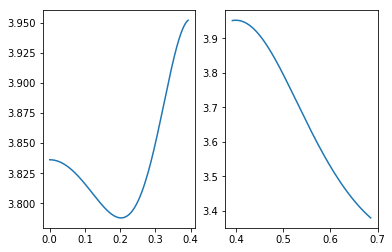

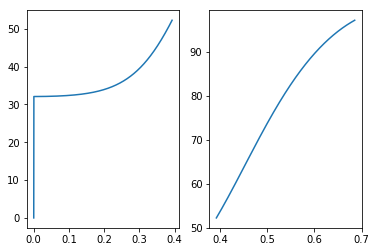

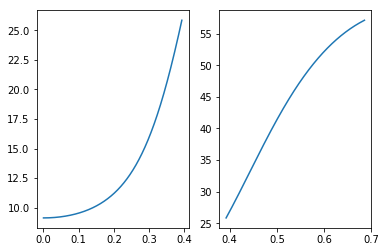

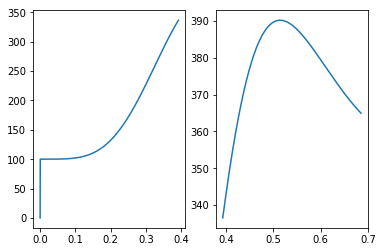

In [270]:
g(5, 2, 3, 0.45)
g(3.5, 2, 1, 11.5)
g(5, 2, 3, 10)
g(10, 1, 20, 1)